![](./pics/asteroids-header.jpg)

# Collision

The easiest way to determine if 2 objects in a game have collided is to encase them in a circle and calculate if the two circles touch.

<img src="pics/circ-not-collid.webp" width="50%">
<img src="pics/circ-collid.webp" width="50%">

Now to calculate if 2 circles collide, we can use the Pathagoras' Theorem. If we use the points A and B to represent the center of object A (objA) and the center of object B (objB) in the diagram below, then the distance between them is $\sqrt {dx^2 + dy^2}$.

<img src="pics/line-segment.png" width="50%">

- for each object:
    - calculate the distance between circle A and circle B
        - $dx = x_{A} - x_{B}$
        - $dy = y_{A} - y_{B}$
        - $distance = \sqrt {dx^2 + dy^2}$
    - Now test:
        - **Collision:** $distance \leq radius_A + radius_B$
        - **No Collision:** $distance > radius_A + radius_B$
 
> **CHEAT:** Now the square root is *mathematically expensive* (or takes a long time to calculate), so it is faster to do: $distance^2 = dx^2 + dy^2$ and compare that to $(radius_A + radius_B)^2$ to determine collision.

In [2]:
import pygame
from matplotlib import pyplot as plt
from matplotlib.patches import Circle

radisu: 4.0 distance: 8
no collision


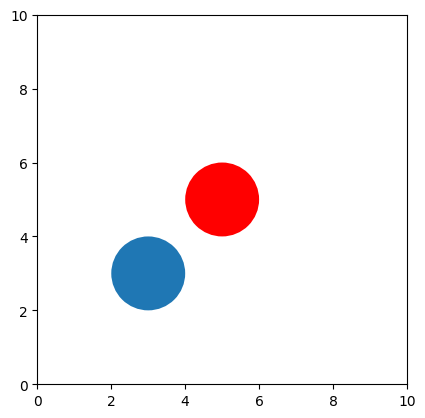

In [26]:
# change the center and radius of the circles
# to test collion between two objects
A = Circle((5,5), 1, facecolor="red")
B = Circle((3,3), 1)

fig, ax = plt.subplots()
ax.add_patch(A)
ax.add_patch(B)
ax.set_aspect('equal')

ax.set_xlim(0, 10.0)
ax.set_ylim(0, 10.0)

xa,ya = A.center
ra = A.radius
xb,yb = B.center
rb = B.radius

dist = (xa-xb)**2 + (ya-yb)**2
r = (ra + rb)**2

print(f"radisu: {r} distance: {dist}")
if dist <= r: print("collision")
elif dist > r: print("no collision")
else: print("error")

## All Game Object Collision

We need to keep track of every object in the game and at each time step (dt), check to see if any objects bumps into each other.
 
| a | b | Status | Why
|---|---|---|---|
| Player | Asteroid | ok | Detect if player destroyed
| Bullet | Asteroid | ok | Detect if asteroid destroyed
| Asteroid | anything | bad | Ignore, only concerned about Player and Bullets
| Asteroid | Asteroid | bad | Asteroids do not destroy each other
| Player | Bullet | bad | Player cannot be destroyed by bullet
| Bullet | Player | bad | Bullets cannot be destroyed by Player
 
```python
world = [] # keep everything in a simple list
world.append(obj) # fill the world with objects
 
for a in world:
    if isinstance(a, Asteroid): continue
    for b in world:
        if a == b: continue
        if not isinstance(b, Asteroid): continue
        ok = collide(a, b)
        if ok: continue
        if not isinstance(a, Player): a.is_dead = True
        b.is_dead = True
        if b.size > 10: world.append(Asteroid(a.x, a.y, size-10)
 
# clean up dead objects
world = filter(lambda item: item if not item.is_dead else None , world) # ???
world = [item for item in world if not item.is_dead]
```